# Neoclassical Growth Model: Deterministic
We have the recursive formulation
\begin{equation}
    \begin{aligned}
        v(k) =&
            \max_{c, k'} && u(c) + \beta v(k') \\ 
        & \text{s.t. }
            && c + k' \leq A k^\alpha + (1-\delta) k
    \end{aligned}
\end{equation}

First, let's code up our VFI solution algorithm.  We split it into two steps:
1. An update step, where we re-solve the maximization problem
2. An outer loop, where we repeatedly call step 1, and check for convergence

In [1]:
# First some package housekeeping -- make sure our environment is activated
using Pkg 
Pkg.activate(@__DIR__)
Pkg.instantiate()

# Load packages
using Parameters
using QuantEcon
using Plots
using Format

  Activating project at `\\iona.sms.ed.ac.uk\home\s1941920\Win7\Desktop\julia testing\week 8 vfi`


  Installing known registries into `C:\Users\s1941920\.julia`

┌ Warning: The active manifest file has dependencies that were resolved with a different julia version (1.9.0-rc1). Unexpected behavior may occur.
└ @ nothing \\iona.sms.ed.ac.uk\home\s1941920\Win7\Desktop\julia testing\week 8 vfi\Manifest.toml:0


   Installed Calculus ───────────────────── v0.5.1


   Installed JpegTurbo_jll ──────────────── v2.1.91+0


   Installed GR_jll ─────────────────────── v0.71.7+0


   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0


   Installed MutableArithmetics ─────────── v1.2.3


   Installed HypergeometricFunctions ────── v0.3.11


   Installed QuantEcon ──────────────────── v0.16.4


   Installed LERC_jll ───────────────────── v3.0.0+1


   Installed StatsFuns ──────────────────── v1.3.0
   Installed FFTW ───────────────────────── v1.6.0
   Installed Preferences ────────────────── v1.3.0


   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed DSP ────────────────────────── v0.7.8
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4


   Installed RelocatableFolders ─────────── v1.0.0


   Installed Measures ───────────────────── v0.3.2


   Installed PDMats ─────────────────────── v0.11.17
   Installed Grisu ──────────────────────── v1.0.2
   Installed Formatting ─────────────────── v0.4.2


   Installed Contour ────────────────────── v0.6.2


   Installed StaticArrays ───────────────── v1.5.17


   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed PlotUtils ──────────────────── v1.3.4
   Installed RecipesPipeline ────────────── v0.6.11


   Installed OpenSSL ────────────────────── v1.3.3
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3


   Installed Cairo_jll ──────────────────── v1.16.1+1


   Installed Xorg_xcb_util_jll ──────────── v0.4.0+1


   Installed Libgpg_error_jll ───────────── v1.42.0+0
   Installed Fontconfig_jll ─────────────── v2.13.93+0


   Installed ColorSchemes ───────────────── v3.20.0
   Installed HTTP ───────────────────────── v1.7.4
   Installed Polynomials ────────────────── v3.2.7
   Installed GR ─────────────────────────── v0.71.7


   Installed IntelOpenMP_jll ────────────── v2018.0.3+2
   Installed Xorg_libxkbfile_jll ────────── v1.1.0+4


   Installed Xorg_libXinerama_jll ───────── v1.1.4+4
   Installed Xorg_libXau_jll ────────────── v1.0.9+4


   Installed FFMPEG ─────────────────────── v0.4.1
   Installed Missings ───────────────────── v1.1.0


   Installed FiniteDiff ─────────────────── v2.18.0


   Installed IrrationalConstants ────────── v0.2.2
   Installed Showoff ────────────────────── v1.0.3


   Installed Qt5Base_jll ────────────────── v5.15.3+2
   Installed ArnoldiMethod ──────────────── v0.2.0
   Installed NLopt ──────────────────────── v0.6.5
   Installed JSON ───────────────────────── v0.21.3


   Installed SpecialFunctions ───────────── v2.2.0
   Installed xkbcommon_jll ──────────────── v1.4.1+0


   Installed Bzip2_jll ──────────────────── v1.0.8+0
   Installed SimpleBufferStream ─────────── v1.1.0
   Installed Xorg_xcb_util_keysyms_jll ──── v0.4.0+1


   Installed Pipe ───────────────────────── v1.3.0


   Installed BenchmarkTools ─────────────── v1.3.2


   Installed HarfBuzz_jll ───────────────── v2.8.1+1
   Installed CodecBzip2 ─────────────────── v0.7.2


   Installed PlotThemes ─────────────────── v3.1.0
   Installed NaNMath ────────────────────── v1.0.2
   Installed StaticArraysCore ───────────── v1.4.0
   Installed MathOptInterface ───────────── v1.13.1
   Installed LZO_jll ────────────────────── v2.10.1+0


   Installed fzf_jll ────────────────────── v0.29.0+0


   Installed FriBidi_jll ────────────────── v1.0.10+0


   Installed UnicodeFun ─────────────────── v0.4.1


   Installed TranscodingStreams ─────────── v0.9.11
   Installed NLSolversBase ──────────────── v7.8.3
   Installed SnoopPrecompile ────────────── v1.0.3


   Installed MathProgBase ───────────────── v0.7.8
   Installed MbedTLS ────────────────────── v1.1.7
   Installed Rmath_jll ──────────────────── v0.4.0+0


   Installed GLFW_jll ───────────────────── v3.3.8+0


   Installed FreeType2_jll ──────────────── v2.10.4+0
   Installed JLFzf ──────────────────────── v0.1.5
   Installed CommonSubexpressions ───────── v0.3.0


   Installed DataStructures ─────────────── v0.18.13
   Installed StatsAPI ───────────────────── v1.5.0
   Installed Colors ─────────────────────── v0.12.10


   Installed CodecZlib ──────────────────── v0.7.1


   Installed Compat ─────────────────────── v4.6.1


   Installed Xorg_libxcb_jll ────────────── v1.13.0+3
   Installed libpng_jll ─────────────────── v1.6.38+0
   Installed libaom_jll ─────────────────── v3.4.0+0


   Installed StatsBase ──────────────────── v0.33.21


   Installed ColorTypes ─────────────────── v0.11.4
   Installed Scratch ────────────────────── v1.2.0
   Installed DiffRules ──────────────────── v1.13.0


   Installed Xorg_libXext_jll ───────────── v1.3.4+4


   Installed TensorCore ─────────────────── v0.1.1


   Installed Expat_jll ──────────────────── v2.4.8+0


   Installed Zstd_jll ───────────────────── v1.5.4+0
   Installed DiffResults ────────────────── v1.1.0
   Installed Plots ──────────────────────── v1.38.7
   Installed Inflate ────────────────────── v0.1.3
   Installed PositiveFactorizations ─────── v0.2.4


   Installed MKL_jll ────────────────────── v2022.2.0+0
   Installed Parsers ────────────────────── v2.5.8


   Installed Libtiff_jll ────────────────── v4.4.0+0
   Installed Setfield ───────────────────── v1.1.1
   Installed Format ─────────────────────── v1.3.2
   Installed AbstractFFTs ───────────────── v1.3.1


   Installed Libffi_jll ─────────────────── v3.2.2+1
   Installed Xorg_libXrender_jll ────────── v0.9.10+4
   Installed ColorVectorSpace ───────────── v0.9.10
   Installed OrderedCollections ─────────── v1.4.1
   Installed ConstructionBase ───────────── v1.5.1
   Installed JLLWrappers ────────────────── v1.4.1


   Installed XSLT_jll ───────────────────── v1.1.34+0
   Installed ArrayInterface ─────────────── v7.2.1


   Installed LineSearches ───────────────── v7.2.0


   Installed LogExpFunctions ────────────── v0.3.23


   Installed Ogg_jll ────────────────────── v1.3.5+1
   Installed Xorg_libXi_jll ─────────────── v1.7.10+4
   Installed Reexport ───────────────────── v1.2.2


   Installed MacroTools ─────────────────── v0.5.10
   Installed ChainRulesCore ─────────────── v1.15.7
   Installed FFTW_jll ───────────────────── v3.3.10+0


   Installed OpenSpecFun_jll ────────────── v0.5.5+0
   Installed Xorg_libXcursor_jll ────────── v1.2.0+4
   Installed UnPack ─────────────────────── v1.0.2


   Installed Libuuid_jll ────────────────── v2.36.0+0
   Installed SimpleTraits ───────────────── v0.9.4


   Installed DocStringExtensions ────────── v0.9.3
   Installed Wayland_protocols_jll ──────── v1.25.0+0
   Installed NLopt_jll ──────────────────── v2.7.1+0
   Installed Xorg_xcb_util_renderutil_jll ─ v0.3.9+1
   Installed Adapt ──────────────────────── v3.6.1


   Installed Graphite2_jll ──────────────── v1.3.14+0


   Installed Pixman_jll ─────────────────── v0.40.1+0
   Installed libass_jll ─────────────────── v0.15.1+0
   Installed XML2_jll ───────────────────── v2.10.3+0
   Installed Rmath ──────────────────────── v0.7.1
   Installed DualNumbers ────────────────── v0.6.8
   Installed IntegerMathUtils ───────────── v0.1.0


   Installed Gettext_jll ────────────────── v0.21.0+0
   Installed Xorg_xtrans_jll ────────────── v1.4.0+3
   Installed Wayland_jll ────────────────── v1.21.0+0
   Installed OpenSSL_jll ────────────────── v1.1.20+0
   Installed Latexify ───────────────────── v0.15.18
   Installed IterTools ──────────────────── v1.4.0


   Installed BitFlags ───────────────────── v0.1.7
   Installed FFMPEG_jll ─────────────────── v4.4.2+2
   Installed Libgcrypt_jll ──────────────── v1.8.7+0


   Installed MakieCore ──────────────────── v0.6.2
   Installed Xorg_xkeyboard_config_jll ──── v2.27.0+4


   Installed DataAPI ────────────────────── v1.14.0
   Installed Xorg_libXrandr_jll ─────────── v1.5.2+4


   Installed RecipesBase ────────────────── v1.3.3
   Installed FixedPointNumbers ──────────── v0.8.4
   Installed Optim ──────────────────────── v1.7.4
   Installed Primes ─────────────────────── v0.5.3


   Installed Xorg_libXfixes_jll ─────────── v5.0.3+4


   Installed LAME_jll ───────────────────── v3.100.1+0
   Installed Libiconv_jll ───────────────── v1.16.1+2
   Installed IniFile ────────────────────── v0.5.1
   Installed LaTeXStrings ───────────────── v1.3.0
   Installed URIs ───────────────────────── v1.4.2


   Installed Glib_jll ───────────────────── v2.74.0+2
   Installed libvorbis_jll ──────────────── v1.3.7+1
   Installed Libglvnd_jll ───────────────── v1.6.0+0
   Installed QuadGK ─────────────────────── v2.8.2
   Installed FillArrays ─────────────────── v0.13.7
   Installed ForwardDiff ────────────────── v0.10.35


   Installed Xorg_libXdmcp_jll ──────────── v1.1.3+4


   Installed Requires ───────────────────── v1.3.0
   Installed Xorg_libX11_jll ────────────── v1.6.9+4


   Installed Observables ────────────────── v0.5.4
   Installed Parameters ─────────────────── v0.12.3


   Installed Unzip ──────────────────────── v0.2.0


   Installed SortingAlgorithms ──────────── v1.1.0
   Installed Distributions ──────────────── v0.25.86


   Installed x264_jll ───────────────────── v2021.5.5+0


   Installed Graphs ─────────────────────── v1.8.0


Precompiling project...


  ✓ PositiveFactorizations


  ✓ Calculus


  ✓ LaTeXStrings


  ✓ TensorCore


  ✓ PDMats


  ✓ StatsAPI


  ✓ Contour


  ✗ AbstractFFTs


  ✓ Pipe


  ✓ UnPack
  ✓ Format

  ✓ IntegerMathUtils

  ✓ OpenLibm_jll


  ✓ FixedPointNumbers


  ✓ FillArrays


  ✓ Measures


  ✓ CompilerSupportLibraries_jll


  ✓ IterTools


  ✓ Grisu


  ✓ Preferences


  ✓ MutableArithmetics


  ✓ OrderedCollections


  ✓ Observables


  ✓ MacroTools
  ✓ libblastrampoline_jll


  ✓ Reexport
  ✓ Requires


  ✗ Compat
  ✓ Unzip


  ✓ MbedTLS_jll
  ✓ Zlib_jll


  ✓ IniFile

  ✓ DocStringExtensions


  ✓ SimpleBufferStream
  ✓ URIs


  ✓ Formatting
  ✓ IrrationalConstants


  ✓ PCRE2_jll


  ✓ Inflate
  ✓ UnicodeFun


  ✓ MathProgBase


  ✓ DataAPI
  ✓ TranscodingStreams


  ✓ BitFlags


  ✓ Scratch
  ✓ ConstructionBase


  ✓ LoggingExtras
  ✓ StaticArraysCore


  ✓ NaNMath


  ✓ Primes


  ✓ OpenBLAS_jll


  ✓ Showoff


  ✓ Parameters


  ✓ SnoopPrecompile
  ✓ JLLWrappers

  ✓ MakieCore


  ✓ CommonSubexpressions
  ✓ SuiteSparse_jll


  ✓ ColorTypes


  ✓ SimpleTraits
  ✓ Adapt


  ✓ LibSSH2_jll


  ✓ MbedTLS


  ✓ Latexify
  ✗ DataStructures


  ✗ ChainRulesCore


  ✗ LogExpFunctions


  ✓ Missings
  ✓ RelocatableFolders
  ✓ CodecZlib


  ✓ DiffResults


  ✓ RecipesBase


  ✓ Setfield


  ✓ OpenSSL_jll


  ✓ Graphite2_jll


  ✓ Libmount_jll


  ✓ Bzip2_jll


  ✓ Rmath_jll


  ✓ Xorg_libXau_jll


  ✓ libpng_jll


  ✓ libfdk_aac_jll


  ✓ IntelOpenMP_jll


  ✓ LAME_jll


  ✓ Pixman_jll


  ✓ StaticArrays


  ✓ LERC_jll


  ✓ fzf_jll


  ✓ JpegTurbo_jll


  ✓ Ogg_jll


  ✓ NLopt_jll


  ✓ Xorg_libXdmcp_jll


  ✓ x265_jll


  ✓ x264_jll


  ✓ libaom_jll


  ✓ Zstd_jll


  ✓ Expat_jll


  ✓ LZO_jll


  ✓ Opus_jll


  ✓ Xorg_xtrans_jll


  ✓ Libiconv_jll


  ✓ Libffi_jll


  ✓ Libgpg_error_jll


  ✓ Wayland_protocols_jll


  ✓ FFTW_jll


  ✓ OpenSpecFun_jll


  ✓ Xorg_libpthread_stubs_jll


  ✓ Libuuid_jll


  ✓ Parsers
  ✓ FriBidi_jll

  ✓ ArrayInterface


  ✓ Colors


  ✗ SortingAlgorithms


  ✗ QuadGK


  ✓ OpenSSL


  ✓ CodecBzip2


  ✓ FreeType2_jll


  ✓ Rmath


  ✓ MKL_jll


  ✗ Polynomials


  ✓ JLFzf


  ✓ libvorbis_jll


  ✓ Libtiff_jll


  ✓ ArnoldiMethod


  ✓ XML2_jll


  ✓ Libgcrypt_jll


  ✓ JSON


  ✓ FiniteDiff


  ✓ Fontconfig_jll


  ✗ SpecialFunctions


  ✗ StatsBase


  ✓ HTTP


  ✓ Gettext_jll


  ✗ FFTW


  ✓ Wayland_jll


  ✓ XSLT_jll


  ✗ Graphs


  ✓ BenchmarkTools
  ✓ DiffRules


  ✓ Glib_jll


  ✓ Xorg_libxcb_jll


  ✗ DualNumbers


  ✗ ColorVectorSpace


  ✓ Xorg_xcb_util_jll


  ✓ Xorg_libX11_jll
  ✗ DSP


  ✓ Xorg_xcb_util_image_jll


  ✓ Xorg_xcb_util_keysyms_jll


  ✗ ForwardDiff


  ✓ Xorg_xcb_util_renderutil_jll


  ✓ Xorg_xcb_util_wm_jll


  ✓ Xorg_libXrender_jll


  ✓ Xorg_libXext_jll


  ✓ Xorg_libXfixes_jll


  ✓ Xorg_libxkbfile_jll


  ✗ HypergeometricFunctions


  ✓ Libglvnd_jll


  ✗ ColorSchemes


  ✓ Xorg_libXinerama_jll


  ✓ Xorg_libXrandr_jll


  ✓ Cairo_jll


  ✓ Xorg_libXcursor_jll


  ✓ Xorg_libXi_jll


  ✓ Xorg_xkbcomp_jll


  ✗ NLSolversBase


  ✓ HarfBuzz_jll


  ✓ GLFW_jll


  ✗ StatsFuns


  ✓ Xorg_xkeyboard_config_jll


  ✓ libass_jll


  ✗ PlotUtils


  ✓ xkbcommon_jll


  ✓ FFMPEG_jll


  ✗ Distributions


  ✗ LineSearches


  ✓ Qt5Base_jll


  ✓ FFMPEG


  ✗ Optim


  ✗ PlotThemes


  ✓ GR_jll


  ✗ RecipesPipeline


  ✓ GR


  ✗ Plots


  ✗ MathOptInterface


  ✗ NLopt


  ✗ QuantEcon


  155 dependencies successfully precompiled in 124 seconds
  30 dependencies errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the packages


ERROR: LoadError: 

ArgumentError: Package AbstractFFTs does not have ChainRulesCore in its dependencies:
- You may have a partially installed environment. Try `Pkg.instantiate()`
  to ensure all packages in the environment are installed.
- Or, if you have AbstractFFTs c

hecked out for development and have
  added ChainRulesCore as a dependency but haven't updated your primary
  environment's manifest file, try `Pkg.resolve()`.
- Otherwise you may need to report an issue with AbstractFFTs
Stacktrace:
 [1] macro expansion
   @ .\loading.jl:1167 [inlined]
 [2] macro expansion
   @ .\lock.jl:223 [inlined]
 [3] require(into::Module, mod::Symbol)
   @ Base .\loading.jl:1144
 [4] include(mod::Module, _path::String)
   @ Base .\Base.jl:419
 [5] include(x::String)
   @ AbstractFFTs C:\Users\s1941920\.julia\packages\AbstractFFTs\0uOAT\src\AbstractFFTs.jl:1
 [6] top-level scope
   @ C:\Users\s1941920\.julia\packages\AbstractFFTs\0uOAT\src\AbstractFFTs.jl:11
 [7] include
   @ .\Base.jl:419 [inlined]
 [8] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
   @ Base .\loading.jl:1554
 [9] top-level scope
   @ 

ERROR: LoadError: 

Failed to precompile AbstractFFTs [621f4979-c628-5d54-868e-fcf4e3e8185c] to C:\Users\s1941920\.julia\compiled\v1.8\AbstractFFTs\jl_F3AA.tmp.
Stacktrace:
  [1] error(s::String)
    @ Base .\error.jl:35
  [2] compilecache(pkg::Base.PkgId, path::String, internal_stderr::IO, internal_stdout::IO, keep_loaded_modules::Bool)
    @ Base .\loading.jl:1707
  [3] compilecache
    @ .\loading.jl:1651 [inlined]
  [4] _require(pkg::Base.PkgId)
    @ Base .\loading.jl:1337
  [5] _require_prelocked(uuidkey::Base.PkgId)
    @ Base .\loading.jl:1200
  [6] macro expansion
    @ .\loading.jl:1180 [inlined]
  [7] macro expansion
    @ .\lock.jl:223 [inlined]
  [8] require(into::Module, mod::Symbol)
    @ Base .\loading.jl:1144
  [9] include
    @ .\Base.jl:419 [inlined]
 [10] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
    @ Base .\loading.jl:1

ERROR: LoadError: 

Failed to precompile FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341] to C:\Users\s1941920\.julia\compiled\v1.8\FFTW\jl_F09D.tmp.
Stacktrace:
  [1] error(s::String)
    @ Base .\error.jl:35


  [2] compilecache(pkg::Base.PkgId, path::String, internal_stderr::IO, internal_stdout::IO, keep_loaded_modules::Bool)
    @ Base .\loading.jl:1707
  [3] compilecache
    @ .\loading.jl:1651 [inlined]
  [4] _require(pkg::Base.PkgId)
    @ Base .\loading.jl:1337
  [5] _require_prelocked(uuidkey::Base.PkgId)
    @ Base .\loading.jl:1200
  [6] macro expansion
    @ .\loading.jl:1180 [inlined]
  [7] macro expansion
    @ .\lock.jl:223 [inlined]
  [8] require(into::Module, mod::Symbol)
    @ Base .\loading.jl:1144
  [9] include
    @ .\Base.jl:419 [inlined]
 [10] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::String)
    @ Base .\loading.jl:1554
 [11] top-level scope
    @ stdin:1
in expression starting at C:\Users\s1941920\.julia\packages\QuantEcon\Exqlu\src\QuantEcon.jl:1
in expression starting at stdin:1


ErrorException: Failed to precompile QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c] to C:\Users\s1941920\.julia\compiled\v1.8\QuantEcon\jl_F06D.tmp.

In [3]:
# Parameters
p = (
    β = 0.9,    # Discount Rate
    δ = 0.1,    # Depreciation of capital
    α = 0.5,    # Returns to scale
    A = 1.0     # Productivity
)

# This is defining a function in Julia called u(c) that takes a single argument c. The function
#  returns the natural logarithm of c if c is greater than 0, and negative infinity (-Inf) otherwise.
u(c)    = c > 0 ? log(c) : -Inf


# that updates a guess of the Bellman value function and policy function for a standard neoclassical
#  growth model with a representative agent. The function is part of a value function iteration 
# algorithm that solves for the optimal policy and value function for the infinite horizon problem.

# V - initial  guess of the value function at each point on the capital grid kgrid (vector)
# policy = guess  guess of the policy function at each point on the capital grid kgrid(vector)
# kgrid: a vector representing the grid of capital values over which to solve the model
# V0: a vector representing the previous guess of the value function at each point 
# on the capital grid kgrid

# The function uses a loop to iterate over each point on the capital grid.
#  For each point, it computes the corresponding value of the production function and
#   calculates the consumption level for each possible capital level in the grid. It then
#  computes the expected value of the value function at the next period for each possible capital level, 
#     using the Bellman equation, and selects the optimal level of capital for the current period that
#      maximizes the expected value of the value function.


function update_bellman!(p, V, policy, kgrid, V0)
    
    @unpack A, β, δ, α = p
    for i in 1:length(kgrid) # loop over elements in kgrid
        k  = kgrid[i] #  k to the ith element of kgrid. This represents the current level of capital being considered.
        z  = A * k^α + (1-δ) * k # value of the production function for the current level of capital k
        # notice there is no k' above therefire independent of future capital
        
        # Vectorized grid search -- we can do this because kgrid is the x-axis
        # of our guess V0
        k′        = kgrid  #  sets the variable k′ to the entire vector kgrid. 
        # This represents the possible levels of capital that can be chosen in the next period.
        c         = z .- k′ # capital in current period(z) - capital in next period/periods
        #note that c is a vector 
        # V0 - previous guess of the value function also a vector

        vmax, ki′ = findmax(u.(c) .+ β .* V0)
        # findmax is used to find the maximum expected value of the value function over all
        # possible capital levels in the next period, and to return the corresponding value vmax and index ki′

        V[i]        = vmax # ith element of the V vector to the maximum expected value of the value function for the current level of capital k
        policy[i]   = ki′
        #  ith element of the policy vector to the index of the capital level in the kgrid vector that 
        # corresponds to the optimal choice of capital ki′
        #  for the current level of capital k
    end
    #the output should be vector V and vector policy, which represents the updated guess of the value function
    # and the policy function for the value function algorithm 
end

#solve! function iteratively updates the value function and policy function using the update_bellman! function until the absolute error between the current and previous 
# value functions is less than the tolerance level tol, and returns the updated value function, policy function, number of iterations, and vector of errors.

function solve!(p, kgrid, V0; tol = 1e-12)
    V       = similar(V0) #create a vector V with the same dimensions as V0 and also the same elements
    policy  = zeros(Int, size(V0)) #make a vector of zeros with dim V0
    errors  = Float64[]  #empty vector to store abs error between current and previous vfi 
    iter    = 0
    while true
        # Update our value function
        iter += 1
        update_bellman!(p, V, policy, kgrid, V0)  
        #function to update the value function and policy function based on the current guess of the value function V0
        #basically the guess will get updated after every iteration using the previous guess 

        # calculate and save the errors
        ϵ = absolute_error(V, V0) # abs(V-V0) current value function - previous value function 
        # ϵ = maximum(abs.(V .- V0))
        push!(errors, ϵ) # appends the current error ϵ to the errors vector.
       
        # stop if we've converged
        ϵ < tol && break # stops if ϵ is lower than tolerance 
        V0 .= V # updates the previous guess of the value function V0 with the updated value function V, using in-place assignment (.) to modify the elements of V0.

    end
    # This line returns a named tuple with the updated value function V, the optimal policy function 
    #policy, the number of iterations iter, and the vector of errors errors
    return (; V, policy, iter, errors)

end
absolute_error(X,X0) = mapreduce(max, X, X0) do x, x0 # he defined a function in a function 
    abs(x-x0)
#calculates the absolute error between two vectors X and X0 element-wise, 
# by taking the maximum absolute difference between each corresponding element of the two vectors
end

# At each iteration, we update the policy function by choosing the consumption-saving decision that maximizes the value function.

absolute_error (generic function with 1 method)

Let's plot how the errors fall over the course of our iterations:

In [4]:
n = 1000
kgrid = LinRange(1e-4, 10, n)
V0 = zeros(n)
solution = solve!(p, kgrid, V0)


@unpack errors = solution 
plot(1:length(errors), errors, yscale = :log10, 
    title  = "Convergence of VFI",
    xlabel = "Number of Iterations",
    ylabel = raw"$||v_s - v_{s-1}||$",
    yticks = 10.0.^(0:-2:-12)
)

UndefVarError: UndefVarError: plot not defined

Let's try to add some policy function iteration steps, to see if that improves things...

Remember, when we do a policy iteration step, we will use the policy functions we calculated in our VFI step, and then apply them repeatedly.


In [5]:
function policy_step(p, V, policy, kgrid, V0)
    @unpack α, A, β, δ = p

    for i in eachindex(V, kgrid)
        # Current capital and savings for tomorrow
        k  = kgrid[i]
        k′ = kgrid[policy[i]]
        
        # Current cash on hands, and consumption
        z  = A * k^α + (1-δ) * k
        c  = z - k′

        # Update value function
        V[i] = u(c) + β * V0[policy[i]]
    end
end

function solve_pfi!(p, kgrid, V0; tol = 1e-12, policy_steps = 0, maxiter = 1000)
    
    V0      = copy(V0)
    V       = similar(V0)
    Vs      = similar(V0)
    policy  = zeros(Int, size(V0))
    errors  = Float64[]  
    iter    = 0
    while true
        # Update our value function
        iter += 1
        update_bellman!(p, Vs, policy, kgrid, V0)  
        V .= Vs # this is redundant, but makes this code work if policy_steps = 0
        
        # Iterate on the policy rule 
        for i in 1:policy_steps
            policy_step(p, V, policy, kgrid, Vs)
            Vs .= V
        end

        # calculate and save the errors
        ϵ = absolute_error(V, V0)
        push!(errors, ϵ)
       
        # stop if we've converged
        ϵ < tol         && break
        iter > maxiter  && break 
        V0 .= V
    end

    return (; V, policy, iter, errors)

end


solve_pfi! (generic function with 1 method)

In [6]:
n = 1000

solution_vfi = solve_pfi!(p, LinRange(1e-4, 10, n), zeros(n))
@unpack errors = solution_vfi
plt = plot(1:length(errors), errors, yscale = :log10, 
    title  = "Convergence of VFI vs. PFI",
    label  = "VFI",
    xlabel = "Number of Iterations",
    ylabel = raw"$||v_s - v_{s-1}||$",
    yticks = 10.0.^(0:-2:-12)
)

# solution_vfi = solve_pfi!(p, LinRange(1e-4, 10, n), zeros(n); policy_steps = 100)

for k in (2,5,10)
    solution_pfi = solve_pfi!(p, LinRange(1e-4, 10, n), zeros(n), policy_steps = k)
    @unpack errors = solution_pfi
    plot!(1:length(errors), errors,
        label = "PFI: $k steps" 
    )
end
display(plt)

UndefVarError: UndefVarError: plot not defined

In [6]:
@info "Value Function Iteration"
@time solution_vfi = solve_pfi!(p, LinRange(1e-4, 10, n), zeros(n))
@info "PFI" k = 5
@time solution_vfi = solve_pfi!(p, LinRange(1e-4, 10, n), zeros(n), policy_steps = 5)

@info "PFI" k = 100
@time solution_vfi = solve_pfi!(p, LinRange(1e-4, 10, n), zeros(n), policy_steps = 100)

┌ Info: Value Function Iteration
└ @ Main /Users/jacobadenbaum/Dropbox/Teaching/2023/Programming for Economics/Lectures/Value Function Iteration/week8_tutorial.ipynb:1


  2.601083 seconds (278.30 k allocations: 2.107 GiB, 5.55% gc time)


┌ Info: PFI
│   k = 5
└ @ Main /Users/jacobadenbaum/Dropbox/Teaching/2023/Programming for Economics/Lectures/Value Function Iteration/week8_tutorial.ipynb:3


  0.477701 seconds (50.07 k allocations: 388.002 MiB, 6.92% gc time)


┌ Info: PFI
│   k = 100
└ @ Main /Users/jacobadenbaum/Dropbox/Teaching/2023/Programming for Economics/Lectures/Value Function Iteration/week8_tutorial.ipynb:6


  0.188723 seconds (16.03 k allocations: 124.187 MiB, 4.78% gc time)


(V = [-46.061706863216735, -7.148700354096011, -6.216893711086472, -5.6411750140890735, -5.221900357567447, -4.8845890897737245, -4.602961481764046, -4.3598676858518015, -4.144724169096595, -3.9518733820854264  …  7.993245659670322, 7.997126203086168, 8.001003539466078, 8.004879406499134, 8.00875320989804, 8.012623675157005, 8.016492206646998, 8.020359188017892, 8.02422058096322, 8.028078857798862], policy = [1, 7, 11, 13, 15, 18, 20, 21, 23, 25  …  934, 935, 936, 936, 937, 938, 939, 940, 941, 942], iter = 16, errors = [46.06060574618427, 40.927115393801785, 5.974789976316332, 0.3294921651029714, 0.11565415195360673, 0.041184854616011624, 0.008432821343085872, 0.002493066604609684, 0.000867542533792065, 0.00023618620337129137, 5.819840757903538e-5, 3.208695574441478e-5, 1.7418573486693845e-5, 7.46322791922438e-6, 3.4291021275834055e-6, 0.0])

# Neoclassical Growth: Stochastic Productivity
Let's go back to the version we saw at the end of lecture, where productivity $A$ is a log-normal AR(1) process.
\begin{equation}
    \begin{aligned}
        v(k, A) =& 
        \max_{c, k'} \;\; 
            & u(c) + &\beta \mathbb E\left[ 
                v(k', A') \middle | A
                \right] \\
        & \text{s.t. }
            & c + k' &\leq A k^\alpha + (1-\delta) k  \\
            && \log(A') &= \rho \log(A) + \epsilon   \\
            && \epsilon &\sim N(0, \sigma)
    \end{aligned}
\end{equation} 
Let's code this up, using the method we discussed in class (discretizing the TFP process with Rouwenhorst's method)

Now let's solve it!

In [7]:
function solve_vfi2!(p, kgrid, V0; tol = 1e-12, maxiter = 1000, debug=false)
    @unpack Na, ρ, σ = p
    V0      = copy(V0)
    V       = zeros(size(V0))
    policy  = zeros(Int, size(V0))
    errors  = Float64[]  
    iter    = 0

    # Discretize the income process
    mc      = rouwenhorst(Na, ρ, σ)
    P       = mc.p'
    agrid   = mc.state_values
    
    grids   = (; kgrid, agrid)
    while true
        iter += 1 
        
        # Step 1: Calculate Expectations
        EV = V * P
        # display(EV)

        # Step 2: Update Bellman Equation
        update_bellman2!(p, V, policy, grids, EV)
        
        # Step 3: Check for convergence 
        ϵ = maximum(abs.(V - V0))
        push!(errors, ϵ)

        ϵ < tol         && break 
        iter >= maxiter && break
        V0 .= V
    end
    return (; V, policy, iter, errors, kgrid, agrid, P)
end

function update_bellman2!(p, V, policy, grids, EV)
    @unpack kgrid, agrid = grids 
    @unpack α, δ, β      = p 

    # Check all the dimensions are right
    length(kgrid) == size(V,1) || throw(error("capital grid size doesn't match V"))
    length(agrid) == size(V,2) || throw(error("TFP grid size doesn't match V"))
    size(EV)      == size(V)   || throw(error("EV and V aren't the same size"))
    
    # Loop over all the indices of V 
    for sub in CartesianIndices(V)
        # Unpack everything 
        ki, ai = sub[1], sub[2]
        k = kgrid[ki]
        A = exp(agrid[ai])
        
        # Cash on hands
        z  = A * k^α + (1-δ) * k 
        k′ = kgrid
        c  = z .- k′
        
        # Do a vectorized grid search 
        # Note: the macro views makes this run a bit faster but otherwise doesn't change anything
        vmax, pol = @views findmax(u.(c) .+ β .* EV[:, ai])
        
        # Store the max values and policies
        V[sub]      = vmax
        policy[sub] = pol
    end
    return 
end


update_bellman2! (generic function with 1 method)

In [41]:
## Run the code 
# Setup parameters
Nk = 600
Na = 30
p  = (; β = 0.9, δ = 0.1, α = 0.5, ρ = 0.7, σ = 0.1, Na)

V0     = zeros(Nk, Na)
kgrid  = LinRange(1e-4, 10, Nk)

# Solve the model 
@time solution = solve_vfi2!(p, kgrid, V0)
@unpack V, policy, errors = solution 

 32.156853 seconds (5.01 M allocations: 23.079 GiB, 5.51% gc time)


(V = [-48.097103920821404 -47.95620487533162 … -8.912758496306207 -8.452244937975534; -10.513623244045956 -10.227398061215144 … -2.3795095031198006 -2.076667093563834; … ; 6.00529443380306 6.129055998511724 … 10.446164864587335 10.618628724220878; 6.01247817089347 6.1361937824836135 … 10.449954372337045 10.622242122826545], policy = [1 1 … 2 2; 4 4 … 11 12; … ; 493 496 … 600 600; 494 497 … 600 600], iter = 278, errors = [5.36137199329617, 4.62125435960255, 4.03066142076289, 3.54667595358449, 3.141035205109464, 2.7948210566572307, 2.4951101698504807, 2.2328546437912493, 2.0015376001366896, 1.7963183219459538  …  2.4868995751603507e-12, 2.2453150450019166e-12, 2.0321522242738865e-12, 1.8332002582610585e-12, 1.6484591469634324e-12, 1.4779288903810084e-12, 1.3287149158713873e-12, 1.2008172234345693e-12, 1.0800249583553523e-12, 9.734435479913373e-13], kgrid = LinRange{Float64}(0.0001, 10.0, 600), agrid = -0.7540739028638985:0.052005096749234384:0.7540739028638985, P = [0.008977364229164094 

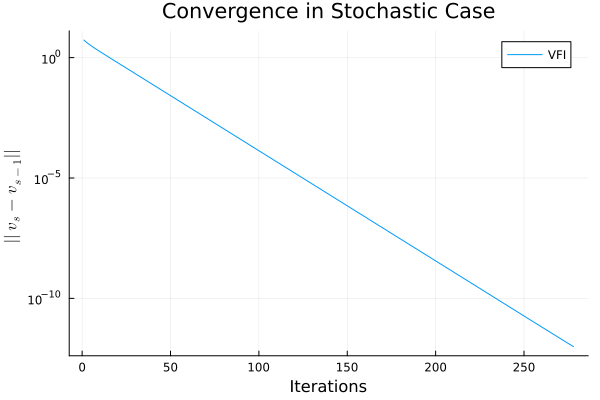

In [37]:
plot(1:length(errors), errors, 
    yscale = :log10,
    title  = "Convergence in Stochastic Case",
    xlabel = "Iterations",
    ylabel = raw"$||v_s - v_{s-1}||$",
    label  = "VFI",
    # yticks = 10.0.^(0:-2:-10)
)

## Policy Functions 
Let's plot the optimal policy functions.  That is, we want to show 
$c(k, A)$ and $k'(k,A)$ that solve our maximization problem.

Note that since we now have a two dimensional state space, we will need to plot these policy functions 
holding one of the states constant.  (In principle, you can do 2d surface plots, but I find they're not very helpful).  So, we'll plot $c(k, A_i)$ for several different fixed TFP values $A_i$ 

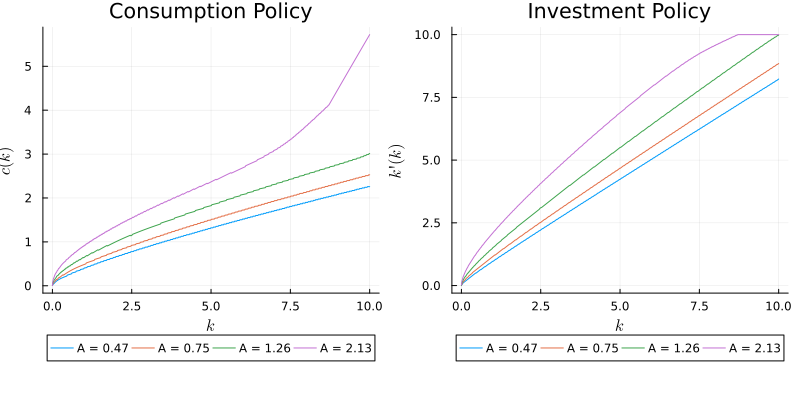

In [56]:
@unpack α, δ         = p
@unpack kgrid, agrid = solution
k′ = kgrid[solution.policy]
z  = exp.(agrid') .* kgrid.^α .+ (1-δ) .* kgrid
c  = z .- k′

# Consumption/investment share 
cs = c./z
ks = k′./z

## First let's plot consumption policy for a variety of TFP values 
AVals = [1, 10, 20, 30]
p1 = plot(legend=:outerbottom, legend_column = -1)
for ai in AVals
    plot!(kgrid, c[:, ai], label = format("A = {:.2f}", exp(agrid[ai])))
end
title!("Consumption Policy")
ylabel!(raw"$c(k)$")
xlabel!(raw"$k$")

## Next let's plot investment policy for the same TFP values
p2 = plot(legend=:outerbottom, legend_column = -1)
for ai in AVals
    plot!(kgrid, k′[:, ai], label = format("A = {:.2f}", exp(agrid[ai])))
end
title!("Investment Policy")
ylabel!(raw"$k'(k)$")
xlabel!(raw"$k$")

plt = plot(p1, p2, size = (800, 400), layout = (1,2))

Note: I had to drive $N_k$ up to 600 to make these policy functions look
relatively smooth (and even now, if you look closely you can see the jagged
edges), and that make our solution take almost 30 seconds.  Try it with 100.
What does it look like?  Does it matter if the policy functions are noisy?

What does it tell you that the investment policy is flat at the top of the
capital grid for large values of $A$?  Do we need to expand the upper end of our
capital grid?